## Take-home exercise

#### Name: Pranisaa Charnparttaravanit
#### st121720

Make sure you can run the PyTorch examples of MNIST classification, then apply the PyTorch example to another
classification problem you've worked with this semester, for example the breast cancer dataset. Get familiar with
working with models in PyTorch.

Report your experiments and results in your brief lab report.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [15]:
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
y = data.target
X = data.data

# def normalize(X):
#     M = X.shape[0]
#     XX = X - np.tile(np.mean(X,0),[M,1])
#     XX = np.divide(XX, np.tile(np.std(XX,0),[M,1]))
#     return XX

# X = normalize(X)


M = X.shape[0]
N = X.shape[1]

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
print(X_train.shape)
y_train = y_train.reshape(-1,1)
print(y_train.shape)
print(X_test.shape)
y_test = y_test.reshape(-1,1)
print(y_test.shape)
# print(type(X_test))

(398, 30)
(398, 1)
(171, 30)
(171, 1)


In [17]:

X_train = torch.FloatTensor(X_train.tolist())
y_train = torch.FloatTensor(y_train.tolist())
print(y_train.shape)
print(X_train.shape)

torch.Size([398, 1])
torch.Size([398, 30])


In [18]:
# hyperparameters
input_size = 30
output_size = 1
hidden_size = 4

epochs = 20
batch_size = 10
learning_rate = 0.001

In [19]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l3(x)
        #sigmoid at the end
        return F.sigmoid(x)

In [20]:
net = Network()
print(net)

Network(
  (l1): Linear(in_features=30, out_features=4, bias=True)
  (relu): ReLU()
  (l3): Linear(in_features=4, out_features=1, bias=True)
)


In [21]:
# optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
loss_func = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [22]:
loss_hist = []
# history = { "loss": [], "accuracy": [], "loss_val": [], "accuracy_val": [] }

for e in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_mini = X_train[i:i + batch_size] 
        y_mini = y_train[i:i + batch_size] 
        
        X_var = Variable(X_mini)
        y_var = Variable(y_mini)
        
        optimizer.zero_grad() #zero_grad clears old gradients from the last step
        
        net_out = net(X_var)
#         print("===============================")
#         print(net_out)
#         print(y_var)
        loss = loss_func(net_out, y_var)
    
        prediction = [1 if x > 0.5 else 0 for x in net_out]
        correct = (torch.FloatTensor(prediction) == y_mini.reshape(-1,1)[0]).sum()    
        
        loss.backward() #computes the derivative of the loss w.r.t. the parameters (or anything requiring gradients) using backpropagation.
        optimizer.step() # causes the optimizer to take a step based on the gradients of the parameters.
        loss_hist.append(loss.item())
        
        
    print('Epoch: {} - Loss: {:.6f}'.format(e, loss.item()))
    

Epoch: 0 - Loss: 0.943640
Epoch: 1 - Loss: 0.617503
Epoch: 2 - Loss: 0.506901
Epoch: 3 - Loss: 0.423799
Epoch: 4 - Loss: 0.360089
Epoch: 5 - Loss: 0.309750
Epoch: 6 - Loss: 0.269922
Epoch: 7 - Loss: 0.238349
Epoch: 8 - Loss: 0.213234
Epoch: 9 - Loss: 0.193154
Epoch: 10 - Loss: 0.176992
Epoch: 11 - Loss: 0.163880
Epoch: 12 - Loss: 0.153150
Epoch: 13 - Loss: 0.144286
Epoch: 14 - Loss: 0.136894
Epoch: 15 - Loss: 0.130667
Epoch: 16 - Loss: 0.125372
Epoch: 17 - Loss: 0.120824
Epoch: 18 - Loss: 0.116882
Epoch: 19 - Loss: 0.113434


In [23]:
print(X_train.shape)
print(X_mini.shape)

print('X_var',X_var.shape)
# print(X_var)
print(net_out[1].shape)

print('correct',correct.numpy())
print('prediction',len(prediction))
print(type(prediction))
print(y_var.shape)
print(net_out.shape)
print(torch.FloatTensor(prediction))
print(y_mini.reshape(1,-1)[0])
# print(history["accuracy"])

torch.Size([398, 30])
torch.Size([8, 30])
X_var torch.Size([8, 30])
torch.Size([1])
correct 5
prediction 8
<class 'list'>
torch.Size([8, 1])
torch.Size([8, 1])
tensor([1., 1., 1., 0., 1., 0., 1., 0.])
tensor([1., 1., 1., 0., 1., 0., 1., 0.])


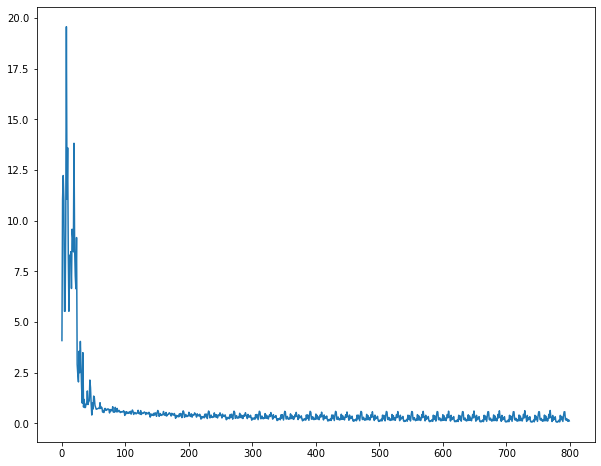

In [24]:
plt.figure(figsize=(10,8))
plt.plot(loss_hist)

In [25]:
test = torch.FloatTensor(X_test.tolist())
test_var = Variable(test)

net_out = net(test_var)

In [26]:
prediction = [1 if x > 0.5 else 0 for x in net_out]
correct = (torch.FloatTensor(prediction) == y_mini.reshape(-1,1)[0]).sum()   

In [27]:
acc = correct.numpy()/ len(prediction)
print(acc)

0.6549707602339181


#### Report
The data i used for this part of the assignment is the breast cancer data taken from sklearn. Since it is a binary classification problem, sigmoid is used at the last layer instead of log_softmax and as the loss function, BCE was also chosen instead of CrossEntropyLoss.

Moreover, as the optimizer i found that Adam optimizer outperforms SGD with momentum.

The hyperparamters for this model are as follows:
1. input_size = 30
2. output_size = 1
3. hidden_size = 4
4. epochs = 20
5. batch_size = 10
6. learning_rate = 0.001